In [1]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#create an engine to connect SQL database to Python
engine = create_engine("sqlite:///mta_data.db")

In [3]:
engine #check to see if the method worked

Engine(sqlite:///mta_data.db)

In [4]:
#assign database to new value
MTA_data = pd.read_sql('SELECT * FROM mta_data;', engine)

In [5]:
MTA_data.info() #get info on database content and type
MTA_data.columns#get name of columns
MTA_data.shape #get shape of data in (x,y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5458607 entries, 0 to 5458606
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 458.1+ MB


(5458607, 11)

In [6]:
MTAClean = MTA_data.copy() 
MTAClean.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,03:00:00,REGULAR,7680606,2656954
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,07:00:00,REGULAR,7680608,2656967
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,11:00:00,REGULAR,7680620,2657068
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,15:00:00,REGULAR,7680671,2657118
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,19:00:00,REGULAR,7680734,2657163
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,23:00:00,REGULAR,7680769,2657179
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/23/2022,03:00:00,REGULAR,7680780,2657185
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/23/2022,07:00:00,REGULAR,7680784,2657190
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/23/2022,11:00:00,REGULAR,7680805,2657231
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/23/2022,15:00:00,REGULAR,7680828,2657272


In [7]:
#concat date & time into one column, dropping the redundant columns
MTAClean['Date_Time'] = MTAClean.DATE + ' ' + MTAClean.TIME
MTAClean.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,03:00:00,REGULAR,7680606,2656954,01/22/2022 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,07:00:00,REGULAR,7680608,2656967,01/22/2022 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,11:00:00,REGULAR,7680620,2657068,01/22/2022 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,15:00:00,REGULAR,7680671,2657118,01/22/2022 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,19:00:00,REGULAR,7680734,2657163,01/22/2022 19:00:00


In [8]:
#convert Date_Time data type from object into datetime
MTAClean['Date_Time'] = pd.to_datetime(MTAClean.Date_Time)
MTAClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5458607 entries, 0 to 5458606
Data columns (total 12 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  Date_Time  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 499.8+ MB


In [9]:
MTAClean['Date_Time'].max()

Timestamp('2022-01-28 23:57:18')

In [10]:
MTAClean['Date_Time'].min()

Timestamp('2021-07-31 00:00:00')

In [11]:
#group by C/A UNIT SCP and STATION to represent a unique turnstile
#shift date, entries, and exits in prep to represent daily traffic flow/turnstile
MTAClean[["Prev_Date", 
          "Prev_Entries",
          "Prev_Exits"]] = (MTAClean.groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES","EXITS"]]
                                                       .apply(lambda x: x.shift(1))) 
MTAClean.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Prev_Date,Prev_Entries,Prev_Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,03:00:00,REGULAR,7680606,2656954,2022-01-22 03:00:00,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,07:00:00,REGULAR,7680608,2656967,2022-01-22 07:00:00,01/22/2022,7680606.0,2656954.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,11:00:00,REGULAR,7680620,2657068,2022-01-22 11:00:00,01/22/2022,7680608.0,2656967.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,15:00:00,REGULAR,7680671,2657118,2022-01-22 15:00:00,01/22/2022,7680620.0,2657068.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,19:00:00,REGULAR,7680734,2657163,2022-01-22 19:00:00,01/22/2022,7680671.0,2657118.0


In [12]:
#Dropped rows that have NaN value
#Dropped total of 5049 rows of data. Now at 5453558 rows. 

MTAClean.dropna(subset=['Prev_Date'], axis=0, inplace=True)
MTAClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5453558 entries, 1 to 5458606
Data columns (total 15 columns):
 #   Column        Dtype         
---  ------        -----         
 0   C/A           object        
 1   UNIT          object        
 2   SCP           object        
 3   STATION       object        
 4   LINENAME      object        
 5   DIVISION      object        
 6   DATE          object        
 7   TIME          object        
 8   DESC          object        
 9   ENTRIES       int64         
 10  EXITS         int64         
 11  Date_Time     datetime64[ns]
 12  Prev_Date     object        
 13  Prev_Entries  float64       
 14  Prev_Exits    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 665.7+ MB


In [13]:
#code shows entries are decreasing in number/day as time moves foward, which is wrong.
#code shows same phenomenon with exits count
check = (MTAClean[MTAClean['ENTRIES'] < MTAClean['Prev_Entries']]).groupby(["C/A", "UNIT", "SCP", "STATION"])
check.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Prev_Date,Prev_Entries,Prev_Exits
1645,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,01/22/2022,07:00:00,REGULAR,885528309,489321828,2022-01-22 07:00:00,01/22/2022,885528313.0,489321867.0
1646,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,01/22/2022,11:00:00,REGULAR,885528295,489321673,2022-01-22 11:00:00,01/22/2022,885528309.0,489321828.0
1647,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,01/22/2022,15:00:00,REGULAR,885528263,489321412,2022-01-22 15:00:00,01/22/2022,885528295.0,489321673.0
1648,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,01/22/2022,19:00:00,REGULAR,885528207,489321157,2022-01-22 19:00:00,01/22/2022,885528263.0,489321412.0
1649,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,01/22/2022,23:00:00,REGULAR,885528170,489321060,2022-01-22 23:00:00,01/22/2022,885528207.0,489321157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166775,PTH18,R549,01-02-08,NEWARK BM BW,1,PTH,08/09/2021,09:10:30,REGULAR,30310,960,2021-08-09 09:10:30,12/30/2021,95046.0,19835.0
5166776,PTH18,R549,01-02-08,NEWARK BM BW,1,PTH,08/09/2021,10:49:37,REGULAR,10576,441,2021-08-09 10:49:37,08/09/2021,30310.0,960.0
5167298,PTH19,R549,02-02-00,NEWARK C,1,PTH,08/07/2021,03:25:07,REGULAR,14767,3388,2021-08-07 03:25:07,08/20/2021,16210.0,3556.0
5366326,OB01,R459,00-00-02,ORCHARD BEACH,6,IND,07/31/2021,00:00:00,REGULAR,1693,488,2021-07-31 00:00:00,08/13/2021,1732.0,501.0


In [14]:
#write a function based on a MTA Exercise encountered during the course
#get the difference of current exit count and prior day exit count for a daily count value
def Daily_Exits(row, max_count):
    count = row['EXITS']-row['Prev_Exits']
    if count < 0:
        count = -count
    if count > max_count:
        return 0
    return count

MTAClean['Daily_Exits'] = MTAClean.apply(Daily_Exits, axis=1, max_count = 200000)
MTAClean.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Prev_Date,Prev_Entries,Prev_Exits,Daily_Exits
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,07:00:00,REGULAR,7680608,2656967,2022-01-22 07:00:00,01/22/2022,7680606.0,2656954.0,13.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,11:00:00,REGULAR,7680620,2657068,2022-01-22 11:00:00,01/22/2022,7680608.0,2656967.0,101.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,15:00:00,REGULAR,7680671,2657118,2022-01-22 15:00:00,01/22/2022,7680620.0,2657068.0,50.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,19:00:00,REGULAR,7680734,2657163,2022-01-22 19:00:00,01/22/2022,7680671.0,2657118.0,45.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,23:00:00,REGULAR,7680769,2657179,2022-01-22 23:00:00,01/22/2022,7680734.0,2657163.0,16.0


In [15]:
#write a function based on a MTA Exercise encountered during the course
#get the difference of current entries count and prior day entries count for a daily count value
def Daily_Entries(row, max_count):
    count = row["ENTRIES"] - row["Prev_Entries"]
    if count < 0:
        count = -count
    if count > max_count:
        return 0
    return count

#set max_count to be 200,000 because based on MTA data from (http://web.mta.info/nyct/facts/ffsubway.htm)
#avg daily ridership at the busiest station is 179,254.187
MTAClean["Daily_Entries"] = MTAClean.apply(Daily_Entries, axis=1, max_count=200000)
MTAClean.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Prev_Date,Prev_Entries,Prev_Exits,Daily_Exits,Daily_Entries
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,07:00:00,REGULAR,7680608,2656967,2022-01-22 07:00:00,01/22/2022,7680606.0,2656954.0,13.0,2.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,11:00:00,REGULAR,7680620,2657068,2022-01-22 11:00:00,01/22/2022,7680608.0,2656967.0,101.0,12.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,15:00:00,REGULAR,7680671,2657118,2022-01-22 15:00:00,01/22/2022,7680620.0,2657068.0,50.0,51.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,19:00:00,REGULAR,7680734,2657163,2022-01-22 19:00:00,01/22/2022,7680671.0,2657118.0,45.0,63.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,23:00:00,REGULAR,7680769,2657179,2022-01-22 23:00:00,01/22/2022,7680734.0,2657163.0,16.0,35.0


In [43]:
#manually turning Date_Time column into an Datetimeindex
#using the Datetimeindex to call the between_time function
#Looking at activity between 6 and 10 am

index = pd.DatetimeIndex(MTAClean['Date_Time']) 
target_time_morning = MTAClean.iloc[index.indexer_between_time('06:00:00','10:00:00')]

activity__morn = target_time_morning.groupby(['STATION','SCP','Date_Time'])[['Daily_Entries','Daily_Exits']].sum()

display(activity__morn)

Daily_Entries  Daily_Exits
STATION   SCP      Date_Time                                      
1 AV      00-00-00 2021-07-31 08:00:00           16.0        159.0
                   2021-08-01 08:00:00            9.0        124.0
                   2021-08-02 08:00:00           22.0        409.0
                   2021-08-03 08:00:00           26.0        451.0
                   2021-08-04 08:00:00           20.0        455.0
...                                               ...          ...
ZEREGA AV 00-05-01 2022-01-24 08:00:00            0.0          0.0
                   2022-01-25 08:00:00            0.0          0.0
                   2022-01-26 08:00:00            0.0          0.0
                   2022-01-27 08:00:00            0.0          0.0
                   2022-01-28 08:00:00            0.0          0.0

[863305 rows x 2 columns]

In [52]:
#dropping entry & exits data points that = 0 to prevent it from influencing the mean
#There was a total of 105,198 hits

activity__morn.drop(activity__morn[(activity__morn['Daily_Entries']==0)&(activity__morn['Daily_Exits']==0)].index,inplace=True)
activity__morn

Daily_Entries  Daily_Exits
STATION   SCP      Date_Time                                      
1 AV      00-00-00 2021-07-31 08:00:00           16.0        159.0
                   2021-08-01 08:00:00            9.0        124.0
                   2021-08-02 08:00:00           22.0        409.0
                   2021-08-03 08:00:00           26.0        451.0
                   2021-08-04 08:00:00           20.0        455.0
...                                               ...          ...
ZEREGA AV 00-05-01 2021-12-02 08:00:00            0.0          1.0
                   2021-12-03 08:00:00            0.0          1.0
                   2021-12-08 08:00:00            0.0          1.0
                   2021-12-14 08:00:00            0.0          3.0
                   2022-01-03 08:00:00            0.0          1.0

[758107 rows x 2 columns]

In [54]:
activity__morn[activity__morn['Daily_Entries']==0].count()

Daily_Entries    43921
Daily_Exits      43921
dtype: int64

In [55]:
activity__morn[activity__morn['Daily_Exits']==0].count()

Daily_Entries    28071
Daily_Exits      28071
dtype: int64

In [57]:
activity__morn[(activity__morn['Daily_Exits']==0)&(activity__morn['Daily_Entries']==0)].count()

Daily_Entries    0
Daily_Exits      0
dtype: int64

In [58]:
#filtering to find daily traffic mean, grouping by station and scp

per_scp_morn = activity__morn.reset_index().groupby(['STATION','SCP'])[['Daily_Entries','Daily_Exits']].sum()

per_scp_morn = per_scp_morn.rename({'Daily_Entries':'Tot_Entries_Morn','Daily_Exits':'Tot_Exits_Morn'},axis=1)

per_scp_morn['Tot_Activity_Morn'] = per_scp_morn['Tot_Entries_Morn']+per_scp_morn['Tot_Exits_Morn']

display(per_scp_morn)

Tot_Entries_Morn  Tot_Exits_Morn  Tot_Activity_Morn
STATION   SCP                                                          
1 AV      00-00-00            3611.0         54273.0            57884.0
          00-00-01            7152.0         41189.0            48341.0
          00-03-00             942.0          9739.0            10681.0
          00-03-01             640.0          3338.0             3978.0
          00-03-02            1527.0          1455.0             2982.0
...                              ...             ...                ...
ZEREGA AV 00-00-01            7628.0          7140.0            14768.0
          00-03-00           15882.0          3545.0            19427.0
          00-03-01           37017.0          3452.0            40469.0
          00-05-00              56.0             0.0               56.0
          00-05-01               0.0            17.0               17.0

[4413 rows x 3 columns]

In [59]:
#finding total mean entries, exits, total activity per station during 6-10am slot 

tot_mean_morn = per_scp_morn.reset_index().groupby(['STATION'])[['Tot_Entries_Morn','Tot_Exits_Morn','Tot_Activity_Morn']].mean()
display(tot_mean_morn)

,Tot_Entries_Morn,Tot_Exits_Morn,Tot_Activity_Morn
STATION,,,
1 AV,2744.166667,9523.833333,12268.000000
103 ST,56241.166667,60958.000000,117199.166667
103 ST-CORONA,54735.555556,10106.000000,64841.555556
104 ST,18226.000000,1647.166667,19873.166667
110 ST,15174.166667,17433.000000,32607.166667
...,...,...,...
WOODLAWN,26607.800000,3269.400000,29877.200000
WORLD TRADE CTR,3084.388889,5473.555556,8557.944444
WTC-CORTLANDT,2401.687500,2908.531250,5310.218750


In [60]:
# Highest avg traffic per station
mean_graph_am = tot_mean_morn['Tot_Activity_Morn'].sort_values(ascending=False).head(15)
display(mean_graph_am)
graph_dict_act = mean_graph_am.to_dict()
display(graph_dict_act)

STATION
ST. GEORGE        210810.000000
JOURNAL SQUARE    174872.960000
103 ST            117199.166667
125 ST             71745.608696
9TH STREET         70888.600000
116 ST             68901.818182
MYRTLE AV          66598.250000
3 AV 138 ST        66228.750000
103 ST-CORONA      64841.555556
111 ST             64119.000000
NEWKIRK PLAZA      61247.200000
SUTTER AV          60453.000000
7 AV               59357.769231
167 ST             59228.571429
YORK ST            59221.000000
Name: Tot_Activity_Morn, dtype: float64

{'ST. GEORGE': 210810.0,
 'JOURNAL SQUARE': 174872.96,
 '103 ST': 117199.16666666667,
 '125 ST': 71745.60869565218,
 '9TH STREET': 70888.6,
 '116 ST': 68901.81818181818,
 'MYRTLE AV': 66598.25,
 '3 AV 138 ST': 66228.75,
 '103 ST-CORONA': 64841.555555555555,
 '111 ST': 64119.0,
 'NEWKIRK PLAZA': 61247.2,
 'SUTTER AV': 60453.0,
 '7 AV': 59357.769230769234,
 '167 ST': 59228.57142857143,
 'YORK ST': 59221.0}

In [25]:
# Alternative methods to try
#df.datetime.dt.time
#.dt.date

#timestamp = '2016-02-22 14:59:44.561776'
#dt = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')

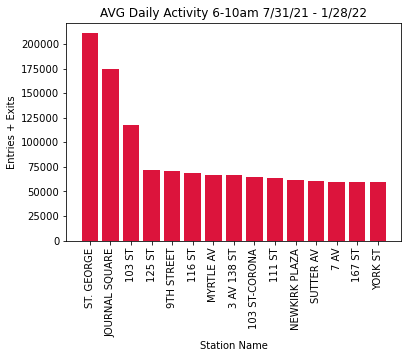

In [81]:
#AM AVG Graph
import numpy as np

x = graph_dict_act.keys()
y = graph_dict_act.values()
plt.bar(x,y, color = 'Crimson')
plt.xticks(rotation = 90)
plt.title('AVG Daily Activity 6-10am 7/31/21 - 1/28/22')
plt.ylabel('Entries + Exits')
plt.xlabel('Station Name')
plt.savefig('AVG Daily Activity AM', dpi=300,bbox_inches='tight')

In [82]:
entry_graph = tot_mean_morn['Tot_Entries_Morn'].sort_values(ascending=False).head(15)
graph_dict_entry_am = entry_graph.to_dict()
display(graph_dict_entry_am)

{'ST. GEORGE': 210603.8,
 'JOURNAL SQUARE': 115088.8,
 '103 ST': 56241.166666666664,
 '111 ST': 55598.0,
 '103 ST-CORONA': 54735.555555555555,
 'NEWKIRK PLAZA': 47749.0,
 'ALLERTON AV': 47148.333333333336,
 'JUNCTION BLVD': 46127.833333333336,
 '25 AV': 45808.0,
 '167 ST': 44885.57142857143,
 'FOREST AVE': 44683.333333333336,
 'CRESCENT ST': 43850.333333333336,
 'MYRTLE AV': 42217.75,
 '20 AV': 41993.8,
 '3 AV 138 ST': 41787.25}

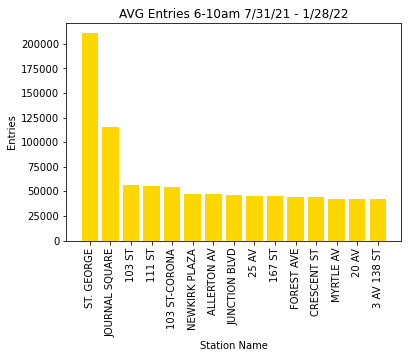

In [83]:
#AM ENTRY GRAPH
x1 = graph_dict_entry_am.keys()
y2 = graph_dict_entry_am.values()
plt.bar(x1,y2, color = 'Gold')
plt.xticks(rotation = 90)
plt.title('AVG Entries 6-10am 7/31/21 - 1/28/22')
plt.ylabel('Entries')
plt.xlabel('Station Name')
plt.savefig('AVG Entries AM', dpi=300,bbox_inches='tight')

In [84]:
exit_graph = tot_mean_morn['Tot_Exits_Morn'].sort_values(ascending=False).head(15)
graph_dict_exit_am = exit_graph.to_dict()
display(graph_dict_exit_am)

{'103 ST': 60958.0,
 'JOURNAL SQUARE': 59784.16,
 'YORK ST': 42868.0,
 '125 ST': 42172.913043478264,
 '9TH STREET': 42017.8,
 '77 ST': 40650.333333333336,
 '7 AV': 39431.46153846154,
 'PATH WTC 2': 35997.0,
 '5 AV/53 ST': 35628.19047619047,
 '72 ST-2 AVE': 34989.23529411765,
 '96 ST': 31494.48,
 '68ST-HUNTER CO': 31470.785714285714,
 '14 ST-UNION SQ': 29751.60975609756,
 '116 ST': 29727.090909090908,
 '138/GRAND CONC': 29212.333333333332}

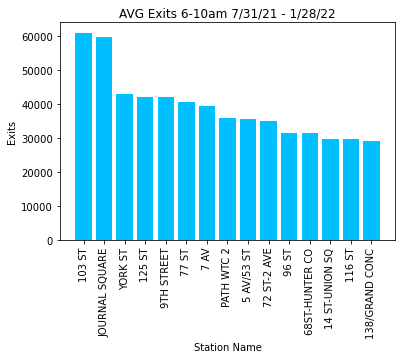

In [85]:
#AM EXIT GRAPH
x3 = graph_dict_exit_am.keys()
y3 = graph_dict_exit_am.values()
plt.bar(x3,y3, color = 'DeepSkyBlue')
plt.xticks(rotation = 90)
plt.title('AVG Exits 6-10am 7/31/21 - 1/28/22')
plt.ylabel('Exits')
plt.xlabel('Station Name')
plt.savefig('AVG Exits AM', dpi=300,bbox_inches='tight')

In [86]:
#Repeating steps for the evening 4:00-7:00pm slot

target_time_evening = MTAClean.iloc[index.indexer_between_time('16:00:00','19:00:00')]
activity__eve = target_time_evening.groupby(['STATION','SCP','Date_Time'])[['Daily_Entries','Daily_Exits']].sum()
display(activity__eve)

Daily_Entries  Daily_Exits
STATION   SCP      Date_Time                                      
1 AV      00-00-00 2021-07-31 16:00:00          111.0        552.0
                   2021-08-01 16:00:00           92.0        455.0
                   2021-08-02 16:00:00          111.0        402.0
                   2021-08-03 16:00:00          135.0        465.0
                   2021-08-04 16:00:00          133.0        489.0
...                                               ...          ...
ZEREGA AV 00-05-01 2022-01-24 16:00:00            0.0          0.0
                   2022-01-25 16:00:00            0.0          0.0
                   2022-01-26 16:00:00            0.0          0.0
                   2022-01-27 16:00:00            0.0          0.0
                   2022-01-28 16:00:00            0.0          0.0

[828633 rows x 2 columns]

In [87]:
#drop evening entry & exit activiy that = 0, 79,880 hits
activity__eve.drop(activity__eve[(activity__eve['Daily_Entries']==0)&(activity__eve['Daily_Exits']==0)].index,inplace=True)
activity__eve

Daily_Entries  Daily_Exits
STATION   SCP      Date_Time                                      
1 AV      00-00-00 2021-07-31 16:00:00          111.0        552.0
                   2021-08-01 16:00:00           92.0        455.0
                   2021-08-02 16:00:00          111.0        402.0
                   2021-08-03 16:00:00          135.0        465.0
                   2021-08-04 16:00:00          133.0        489.0
...                                               ...          ...
ZEREGA AV 00-05-01 2021-12-12 16:00:00            0.0          1.0
                   2021-12-14 16:00:00            0.0          1.0
                   2021-12-15 16:00:00            0.0          3.0
                   2021-12-21 16:00:00            0.0          1.0
                   2022-01-03 16:00:00            0.0          1.0

[748753 rows x 2 columns]

In [88]:
activity__eve[activity__eve['Daily_Entries']==0].count()

Daily_Entries    21959
Daily_Exits      21959
dtype: int64

In [89]:
activity__eve[activity__eve['Daily_Exits']==0].count()

Daily_Entries    26412
Daily_Exits      26412
dtype: int64

In [90]:
#filtering to find daily traffic mean, grouping by station and scp in the evening

per_scp_eve = activity__eve.reset_index().groupby(['STATION','SCP'])[['Daily_Entries','Daily_Exits']].sum()

per_scp_eve = per_scp_eve.rename({'Daily_Entries':'Tot_Entries_Eve','Daily_Exits':'Tot_Exits_Eve'},axis=1)

per_scp_eve['Tot_Activity_Eve'] = per_scp_eve['Tot_Entries_Eve']+per_scp_eve['Tot_Exits_Eve']

display(per_scp_eve)

Tot_Entries_Eve  Tot_Exits_Eve  Tot_Activity_Eve
STATION   SCP                                                       
1 AV      00-00-00          40238.0        89814.0          130052.0
          00-00-01          55460.0        48251.0          103711.0
          00-03-00           8214.0        22044.0           30258.0
          00-03-01           5223.0         6668.0           11891.0
          00-03-02          10255.0         2227.0           12482.0
...                             ...            ...               ...
ZEREGA AV 00-00-01           5911.0        12607.0           18518.0
          00-03-00           9344.0         6824.0           16168.0
          00-03-01          17775.0         6777.0           24552.0
          00-05-00             78.0            0.0              78.0
          00-05-01              0.0           18.0              18.0

[4435 rows x 3 columns]

In [91]:
#finding total mean entries, exits, total activity per station during 4-7pm slot 

tot_mean_eve = per_scp_eve.reset_index().groupby(['STATION'])[['Tot_Entries_Eve','Tot_Exits_Eve','Tot_Activity_Eve']].mean()
display(tot_mean_eve)

,Tot_Entries_Eve,Tot_Exits_Eve,Tot_Activity_Eve
STATION,,,
1 AV,18731.375000,27238.833333,45970.208333
103 ST,106749.166667,92736.166667,199485.333333
103 ST-CORONA,38860.111111,70494.666667,109354.777778
104 ST,9411.666667,11504.333333,20916.000000
110 ST,36750.500000,45824.333333,82574.833333
...,...,...,...
WOODLAWN,22274.600000,12234.200000,34508.800000
WORLD TRADE CTR,16568.166667,13846.055556,30414.222222
WTC-CORTLANDT,6267.121212,6851.848485,13118.969697


In [92]:
# Highest evening avg traffic per station
mean_graph_pm = tot_mean_eve['Tot_Activity_Eve'].sort_values(ascending=False).head(15)
display(mean_graph_pm)
graph_dict_actpm = mean_graph_pm.to_dict()
display(graph_dict_actpm)

STATION
ST. GEORGE         322257.880000
103 ST             199485.333333
145 ST             152752.545455
125 ST             138840.304348
YORK ST            130378.666667
GRAND ST           127623.727273
191 ST             122262.500000
116 ST             114665.727273
82 ST-JACKSON H    111817.700000
34 ST-HERALD SQ    111698.951220
103 ST-CORONA      109354.777778
HOYT-SCHER         105445.200000
167 ST             104611.285714
86 ST              103694.052632
7 AV               101515.692308
Name: Tot_Activity_Eve, dtype: float64

{'ST. GEORGE': 322257.88,
 '103 ST': 199485.33333333334,
 '145 ST': 152752.54545454544,
 '125 ST': 138840.30434782608,
 'YORK ST': 130378.66666666667,
 'GRAND ST': 127623.72727272728,
 '191 ST': 122262.5,
 '116 ST': 114665.72727272728,
 '82 ST-JACKSON H': 111817.7,
 '34 ST-HERALD SQ': 111698.9512195122,
 '103 ST-CORONA': 109354.77777777778,
 'HOYT-SCHER': 105445.2,
 '167 ST': 104611.28571428571,
 '86 ST': 103694.05263157895,
 '7 AV': 101515.69230769231}

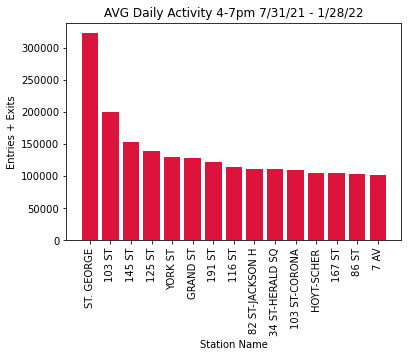

In [93]:
pmx = graph_dict_actpm.keys()
pmy = graph_dict_actpm.values()
plt.bar(pmx,pmy,color='Crimson')
plt.xticks(rotation = 90)
plt.title('AVG Daily Activity 4-7pm 7/31/21 - 1/28/22')
plt.ylabel('Entries + Exits')
plt.xlabel('Station Name')
plt.savefig('AVG Daily Activity PM', dpi=300,bbox_inches='tight')

In [94]:
entry_graph_pm = tot_mean_eve['Tot_Entries_Eve'].sort_values(ascending=False).head(15)
graph_dict_entry_pm = entry_graph_pm.to_dict()
display(graph_dict_entry_pm)

{'ST. GEORGE': 321940.72,
 '103 ST': 106749.16666666667,
 '145 ST': 72306.27272727272,
 'GRAND ST': 69742.81818181818,
 'YORK ST': 68505.66666666667,
 '125 ST': 64445.69565217391,
 '116 ST': 61109.72727272727,
 'CATHEDRAL PKWY': 57849.57142857143,
 '96 ST': 52319.8,
 'QUEENSBORO PLZ': 51722.5,
 '23 ST': 50733.07692307692,
 '34 ST-HERALD SQ': 49460.90243902439,
 '86 ST': 49268.10526315789,
 '7 AV': 48905.307692307695,
 'HOYT-SCHER': 48480.6}

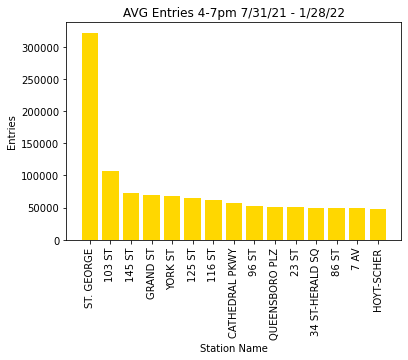

In [95]:
#PM ENTRY GRAPH
pmx2 = graph_dict_entry_pm.keys()
pmy2 = graph_dict_entry_pm.values()
plt.bar(pmx2,pmy2,color='Gold')
plt.xticks(rotation = 90)
plt.title('AVG Entries 4-7pm 7/31/21 - 1/28/22')
plt.ylabel('Entries')
plt.xlabel('Station Name')
plt.savefig('AVG Entries PM', dpi=300,bbox_inches='tight')

In [96]:
exit_graph_pm = tot_mean_eve['Tot_Exits_Eve'].sort_values(ascending=False).head(15)
graph_dict_exit_pm = exit_graph_pm.to_dict()
display(graph_dict_exit_pm)

{'103 ST': 92736.16666666667,
 '145 ST': 80446.27272727272,
 '191 ST': 79081.75,
 '125 ST': 74394.60869565218,
 '82 ST-JACKSON H': 72645.9,
 '103 ST-CORONA': 70494.66666666667,
 '34 ST-PENN STA': 63458.53968253968,
 '34 ST-HERALD SQ': 62238.04878048781,
 'YORK ST': 61873.0,
 'JUNCTION BLVD': 61429.083333333336,
 '167 ST': 61038.28571428572,
 'TIMES SQ-42 ST': 60045.27027027027,
 '42 ST-PORT AUTH': 59825.2972972973,
 'JKSN HT-ROOSVLT': 58763.318181818184,
 'BROADWAY': 58145.71428571428}

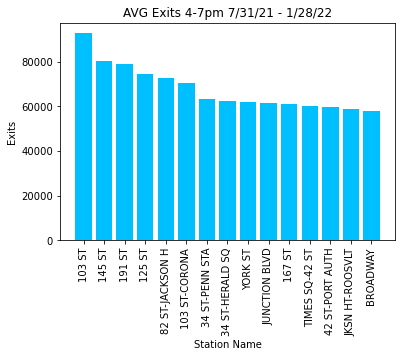

In [97]:
#PM EXIT GRAPH
pmx3 = graph_dict_exit_pm.keys()
pmy3 = graph_dict_exit_pm.values()
plt.bar(pmx3,pmy3,color='DeepSkyBlue')
plt.xticks(rotation = 90)
plt.title('AVG Exits 4-7pm 7/31/21 - 1/28/22')
plt.ylabel('Exits')
plt.xlabel('Station Name')
plt.savefig('AVG Exits PM', dpi=300,bbox_inches='tight')